# Introducción

La ecuación de Schrödinger unidimensional independiente del tiempo para una partícula sin spin es

$$
\begin{equation}
-\dfrac{\hbar^2}{2m} \dfrac{d^2\varphi}{dx^2} + V(x) \varphi(x) = E \varphi(x).
\end{equation}
$$

Vamos a restringir los potenciales a estudiar a aquellos para los cuales $V(a) = V(b) = \infty$, para dados $a$ y $b$ tales que $b-a = L > 0$. En esos casos, puede demostrarse que las soluciones satisfacen $\varphi(a) = \varphi(b) = 0$, lo cual representa nuestras condiciones de contorno.

La ecuación de Schrödinger así enunciada representa un caso particular de lo que se conoce como **problemas regulares de Sturm-Liouville**. Como tal, satisface una serie de enunciados, a saber:

- Existe un conjunto infinito de autovalores $E_0 < E_1 < \dots $. De particular importancia para nosotros será el menor autovalor, $E_0$, ya que representa el estado fundamental del sistema.
- Las autofunciones correspondientes $\varphi^{(0)}(x), \varphi^{(1)}(x), \dots$ son **completas**. Esto quiere decir que cualquier función suave a trozos $f(x)$ definida en el intervalo $[a, b]$ puede construirse como una combinación lineal $f(x) \sim \sum_i a_i \varphi^{(0)}(x)$.
- Las autofunciones son **ortogonales** ($\int_a^b \varphi^{(i)}(x) \varphi^{(j)}(x) dx = \delta_{ij}$).

El pozo de potencial unidimensional es un caso particular de una partícula confinada en el espacio para el cual $V(x) = 0$. Si consideramos $a=0$ y $b=L$, las soluciones vienen dadas por los pares de autovalores y autovectores

$$
\begin{equation}
E_n = \dfrac{n^2\pi^2 \hbar^2}{2 m L^2},\quad \varphi^{(n)} = \sqrt{\dfrac{2}{L}}\sin(n\pi x / L).
\end{equation}
$$

En general, cuando $V(x) \neq 0$, las autofunciones $\varphi(x)$ son más complicadas, pero continuan constituyendo un conjunto completo y ortonormal, garantizado por el teorema de Sturm-Liouville. En esta notebook veremos cómo emplear técnicas numéricas para determinar las soluciones para estos casos.

## Adimensionalización de la ecuación

Cuando trabajamos con simulaciones numéricas, resulta conveniente adimensionalizar las ecuaciones, variables y constantes asociadas. Comenzamos con la convención física de tomar $\hbar = 1$. Esta convención modifica las unidades en las que se miden las cantidades físicas. Por ejemplo, si partimos del sistema internacional de unidades, el tiempo se mide en $1/\mathrm{J}$. Veremos más adelante cómo recuperar las unidades correctas.

Con esta convención, y multiplicando ambos miembros por $m$, la ecuación de Schrödinger toma la forma

$$
\begin{equation}
-\dfrac{1}{2} \dfrac{d^2\varphi}{dx^2} + mV(x) \varphi(x) = mE \varphi(x).
\end{equation}
$$

Realizamos ahora los cambios de variables $u = x / L$, $\tilde{V} = mL^2 V$ y $\lambda =mL^2E$. Con estos cambio de variables, la ecuación resultante es 

$$
\begin{equation}
-\dfrac{1}{2} \dfrac{d^2\varphi}{du^2} + \tilde{V}(u) \varphi(u) = \lambda \varphi(u)
\end{equation}
$$

Además, particularizamos $a=0$ y $b=L$, de manera que nuestras condiciones de contorno toman la forma simplificada

$$
\begin{equation}
\varphi(u=0) = \varphi(u=1) = 0.
\end{equation}
$$

El siguiente paso es llevar nuestra ecuación a una ecuación discreta. Para eso, vamos a transformar la **ecuación diferencial** en una ecuación de **diferencias finitas** empleando intervalos discretos $\Delta u$. Usando el hecho de que la derivada segunda se puede aproximar mediante

$$
\begin{equation}
\dfrac{d^2f}{dx^2}_{x=j\Delta x} \simeq \dfrac{f_{j+1}+2f_j - f_{j-1}}{(\Delta x)^2}, \quad f_j \equiv f(j \Delta x), \quad j = 0,1,\dots,N.
\end{equation}
$$

podemos reescribir nuestra ecuación como

$$
-\dfrac{\varphi_{j+1} - 2\varphi_j + \varphi_{j-1}}{2(\Delta y)^2} + \tilde{V}_j \varphi_j = \lambda \varphi_j.
$$

Reordenando los términos, tenemos

$$
-\dfrac{1}{2(\Delta y)^2}\varphi_{j+1} + \left[ \dfrac{1}{(\Delta y)^2} + \tilde{V}_j\right] \varphi_j - \dfrac{1}{2(\Delta y)^2}\varphi_{j-1} = \lambda \varphi_j.
$$

En otras palabras, obtuvimos un sistema de ecuaciones lineales

$$
\begin{align}
-\dfrac{1}{2(\Delta y)^2}\varphi_{2} + \left[ \dfrac{1}{(\Delta y)^2} + \tilde{V}_1\right] \varphi_1 - \dfrac{1}{2(\Delta y)^2}\varphi_{0} &= \lambda \varphi_0. \\
-\dfrac{1}{2(\Delta y)^2}\varphi_{3} + \left[ \dfrac{1}{(\Delta y)^2} + \tilde{V}_2\right] \varphi_2 - \dfrac{1}{2(\Delta y)^2}\varphi_{1} &= \lambda \varphi_1. \\
\vdots \\
-\dfrac{1}{2(\Delta y)^2}\varphi_{N} + \left[ \dfrac{1}{(\Delta y)^2} + \tilde{V}_{N-1}\right] \varphi_{N-1} - \dfrac{1}{2(\Delta y)^2}\varphi_{N-2} &= \lambda \varphi_{N-2},
\end{align}
$$

donde $N = 1 / \Delta u$ es el número de puntos en que dividimos nuestro intervalo $u\in [0, 1]$. Este sistema puede ser escrito mediante la ecuación matricial

$$
\begin{equation}
\begin{bmatrix}
\dfrac{1}{(\Delta y)^2} + \tilde{V}_1 & -\dfrac{1}{2(\Delta y)^2} & 0 & 0 & 0\\
-\dfrac{1}{2(\Delta y)^2} & \dfrac{1}{(\Delta y)^2} + \tilde{V}_2 & -\dfrac{1}{2(\Delta y)^2} & 0 & 0 \\
0 & -\dfrac{1}{2(\Delta y)^2} & \dfrac{1}{(\Delta y)^2} + \tilde{V}_3 & -\dfrac{1}{2(\Delta y)^2} & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & -\dfrac{1}{2(\Delta y)^2} & \dfrac{1}{(\Delta y)^2} + \tilde{V}_{N-1} & -\dfrac{1}{2(\Delta y)^2} \\
\end{bmatrix}

\begin{bmatrix}
\varphi_1 \\ \varphi_2 \\\vdots \\ \varphi_{N-1}
\end{bmatrix}
=
\lambda \begin{bmatrix}
\varphi_1 \\ \varphi_2 \\\vdots \\ \varphi_{N-1}
\end{bmatrix}

\end{equation}
$$

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import eigh_tridiagonal

sns.set_context("talk")

Definimos la cantidad de puntos para nuestra grilla

In [48]:
N = 100
du = 1/N
u = np.linspace(0, 1, N+1)

Definimos nuestro potencial

In [76]:
def V_tilde(u):
    return 100 * np.exp(-(u-0.25)**2/(2*0.05**2)) - 50*np.exp(-(u-0.6)**2/(2*0.05**2))

Graficamos el potencial.

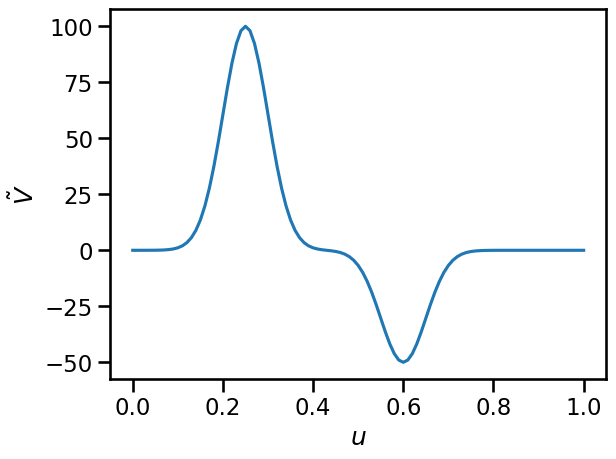

In [77]:
fig, ax = plt.subplots()
ax.plot(u, V_tilde(u))
ax.set_xlabel(r"$u$")
ax.set_ylabel(r"$\tilde{V}$")
plt.show()

Aplicamos el método `eigh_tridiagonal` de la librería `scipy` para resolver el sistema de ecuaciones.

In [78]:
d = 1/du**2 + V_tilde(u)[1:-1]
e = -1/(2*du**2) * np.ones(len(d)-1)

lambdas, phis = eigh_tridiagonal(d, e)

Graficamos los autovalores obtenidos.

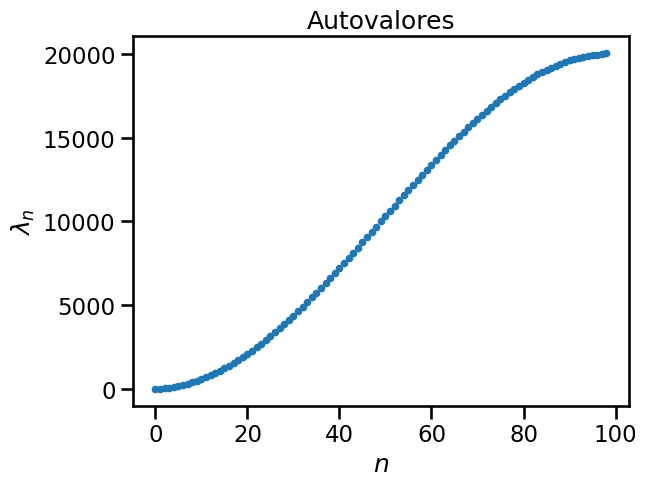

In [79]:
fig, ax = plt.subplots()
ax.set_title("Autovalores")
ax.set_ylabel(r"$\lambda_n$")
ax.set_xlabel(r"$n$")
ax.plot(lambdas, '.')
plt.show()

Graficamos los autoestados.

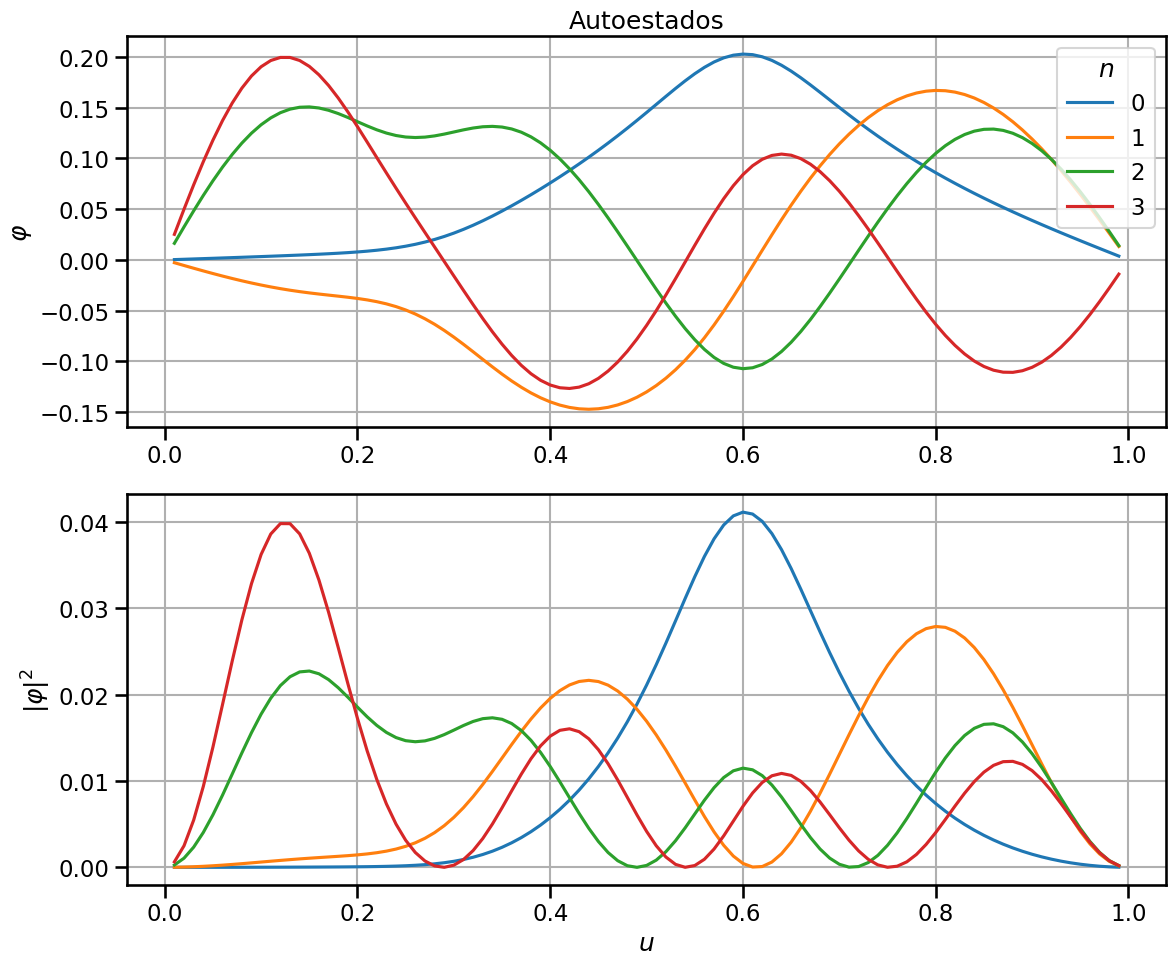

In [84]:
fig, axes = plt.subplots(figsize=(12,10), nrows=2)
for ax in axes:
    ax.grid()

ax = axes[0]
for i in range(4):
    ax.plot(u[1:-1], phis[:,i], label=i)
ax.legend(title=r"$n$", loc="upper right")
ax.set_title("Autoestados")
ax.set_ylabel(r'$\varphi$')

ax = axes[1]
for i in range(4):
    ax.plot(u[1:-1], np.abs(phis[:,i])**2)
ax.set_ylabel(r'$|\varphi|^2$')
ax.set_xlabel(r"$u$")
plt.tight_layout()
plt.show()

## Ejercicios

1. Considerar el pozo infinito de potencial ($V(x)=0$). Determinar numéricamente las energías y autofunciones para el estado fundamental y los tres primeros estados exitados. Comparar con las soluciones analíticas. Analizar el error numérico como función del número de puntos en la grilla $N$.
2. Considerar un potencial de la forma $V(x) = r (x-L/2)^2$. Debido a que el método aquí descripto requiere que el potencial tenga paredes infinitas en sus extremos, este caso no es exactamente un oscilador armónico. Eligiendo $N$ suficientemente grande como para minimizar el error numérico, estudiar la diferencia entre las soluciones analíticas para el oscilador armónico y las soluciones obtenidas mediante este método (analizar los cuatro estados de menor energía).